In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Set a seed for reproducibility
import torch
from _fastica import FastICA_Torch

In [2]:
# Number of samples
torch.manual_seed(0)
n_samples = 100
ns = torch.linspace(0, 4 * 3.14, n_samples)
# Generate three source signals
s1 = torch.sin(2 * ns).double()  # Signal 1 : sinusoidal signal
s2 = torch.sign(torch.sin(3 * ns)).double()  # Signal 2 : square signal
s3 = torch.rand(n_samples).double()  # Signal 3 : uniformly distributed random signal

# Stack the sources vertically
S = torch.stack((s1, s2, s3))

# Standardize the sources
S = (S - torch.mean(S, dim=1, keepdim=True)) / torch.std(S, dim=1, keepdim=True)

# Create a mixing matrix
A = torch.tensor([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]).double()

# Mix the sources
X = torch.mm(A, S)

print("Shape of the generated data: ", X.shape)



Shape of the generated data:  torch.Size([3, 100])


In [3]:
ns = ns.numpy()

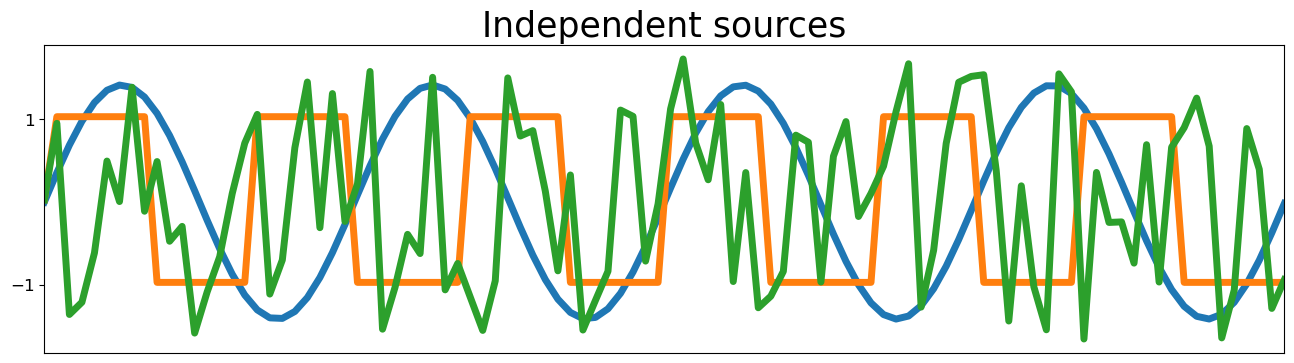

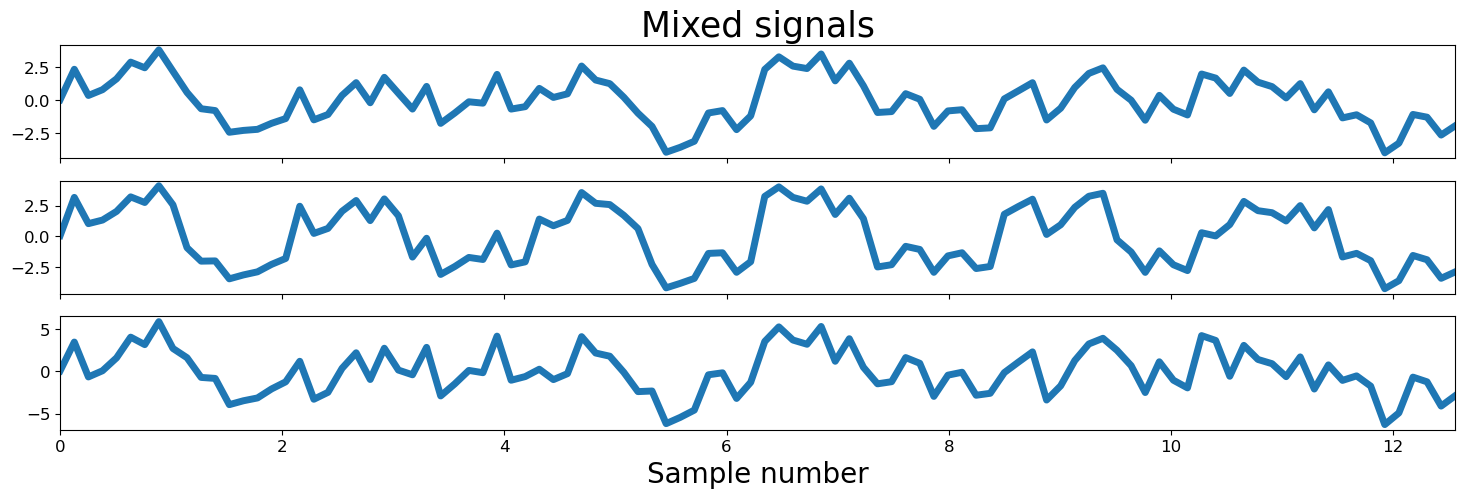

In [9]:
# Plot sources & signals

fig, ax = plt.subplots(1, 1, figsize=[16, 4])
ax.plot(ns, S.clone().detach().numpy().T, lw=5)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_xlim(ns[0], ns[n_samples-1])
ax.tick_params(labelsize=12)
ax.set_title('Independent sources', fontsize=25)

# plt.savefig('source_signals.png')

fig, ax = plt.subplots(3, 1, figsize=[18, 5], sharex=True)
ax[0].plot(ns, X[0], lw=5)
ax[0].set_title('Mixed signals', fontsize=25)
ax[0].tick_params(labelsize=12)

ax[1].plot(ns, X[1], lw=5)
ax[1].tick_params(labelsize=12)
ax[1].set_xlim(ns[0], ns[-1])

ax[2].plot(ns, X[2], lw=5)
ax[2].tick_params(labelsize=12)
ax[2].set_xlim(ns[0], ns[-1])
ax[2].set_xlabel('Sample number', fontsize=20)
ax[2].set_xlim(ns[0], ns[n_samples-1])

plt.show()
# plt.savefig('mixed_signals.png')

In [5]:
# random_state = np.random.RandomState(seed=42)
# w_init = np.asarray(
#     random_state.normal(size=(3,3)), dtype="float32"
# )

In [6]:
fastica = FastICA_Torch(max_iter = 200, whiten_solver = 'svd')
S_ = fastica.fit_transform(X)

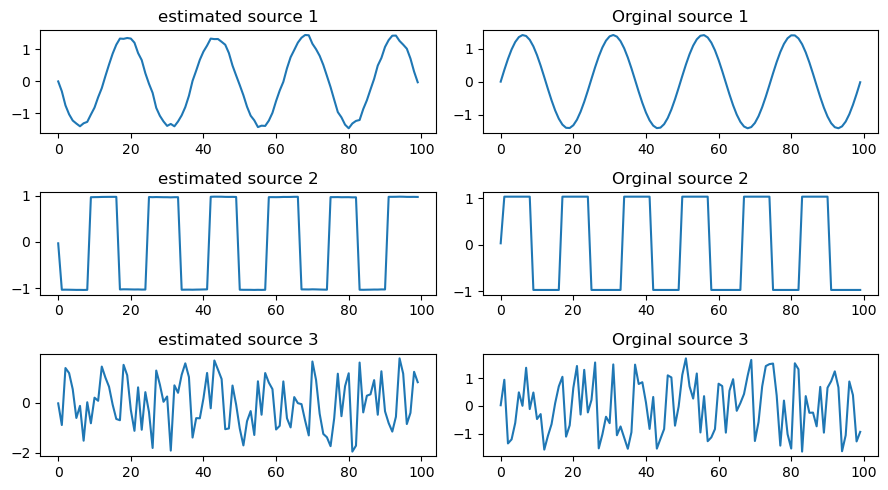

In [7]:
# Assume S_ is the estimated sources
# Plot original sources
plt.figure(figsize=(9, 5))
for i, x in enumerate(S_):
    plt.subplot(3, 2, 2*i+1)
    plt.plot(x)
    plt.title(f'estimated source {i+1}')

# Plot estimated sources
for i, x in enumerate(S):
    plt.subplot(3, 2, 2*i+2)
    plt.plot(x)
    plt.title(f'Orginal source {i+1}')

plt.tight_layout()

plt.savefig('estimated_orginal_source.png')
# plt.show()